## **Data Exploration**

In [2]:
import numpy as np
import pandas as pd

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
data = data.drop('id', axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [8]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [9]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [10]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [11]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [12]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [13]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [14]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [15]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [16]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [17]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [19]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

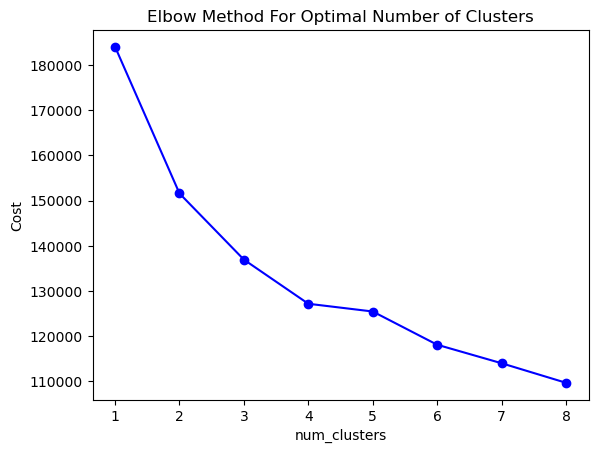

In [20]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [21]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [22]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


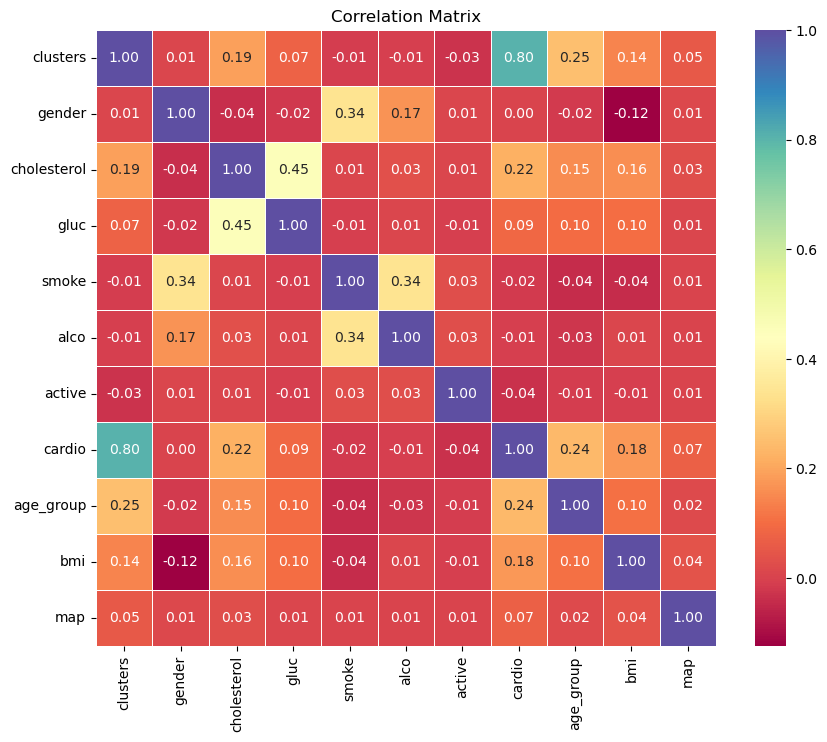

In [23]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

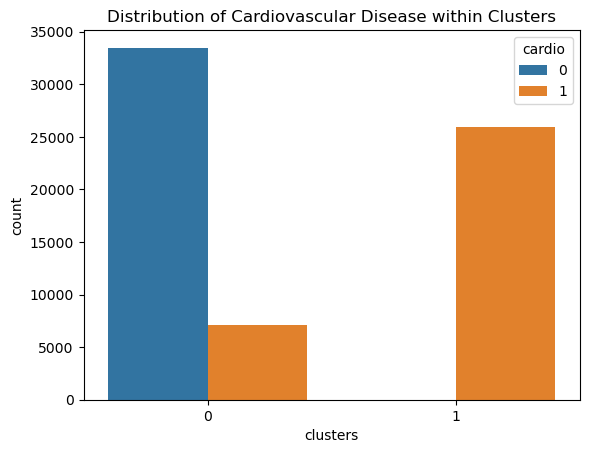

In [24]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [25]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [27]:
from sklearn.utils import resample

In [28]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [29]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.33294329 -0.57087829  1.26113353 ...  1.50599171 -0.5587638
  -0.1504095 ]
 [-0.79971275 -0.53743986 -0.16969604 ...  0.00377327 -0.54185217
   0.04756193]
 [-0.73108272 -0.42509306 -0.32328917 ... -0.12673032 -0.54980751
  -0.079644  ]
 ...
 [ 1.21258412  2.39323559 -0.25907693 ...  1.20720964  0.79076398
  -0.18435019]
 [-0.76228932 -0.59694409 -0.30034836 ... -0.57493578  0.47038569
  -0.04265005]
 [-0.60547128 -0.40613388 -0.47317437 ... -0.5951611  -0.52396581
   0.12233881]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.25955998 -0.52998427 -0.50312286 ...  0.67685805  0.72474461
   0.04753085]
 [ 1.04173777  1.06076477 -0.36676725 ...  0.7419464   0.62538825
  -0.23495188]
 [-0.95075477  2.63528863 -0.32804424 ... -0.98921452 -0.63697113
  -0.2651195 ]
 ...
 [ 1.10044661  1.00278501 -0.41275364 ...  0.6573067  -0.4950638
  -0.08260116]
 [ 1.05365195 -0.64243622 -0.51464231 ...  1.09200408  0.58078571
  -0.18964136]
 [-0.76070248 -0.4

In [30]:
# # Split the augmented data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_augmented_smote, y_augmented_smote, test_size=0.2, random_state=42)

# print("Training data (x):")
# print(x_train)
# print("\nTraining data (y):")
# print(y_train)
# print("\nTesting data (x):")
# print(x_test)
# print("\nTesting data (y):")
# print(y_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [33]:
torch.cuda.is_available()

False

In [34]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        # If out has 3 dimensions, select the last time step output
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
        # If out has 2 dimensions (sequence length is 1), directly pass through the fully connected layer
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [35]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [36]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)

rnn_model = RNNModel()
batch_size = 64
epochs = 60
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/60, Average Loss: 0.36244544810576534
Epoch 5/60, Average Loss: 0.16261108612181038
Epoch 10/60, Average Loss: 0.15075055000193088
Epoch 15/60, Average Loss: 0.1488150281691423
Epoch 20/60, Average Loss: 0.1480910908007992
Epoch 25/60, Average Loss: 0.14764565739028485
Epoch 30/60, Average Loss: 0.14739063361675223
Epoch 35/60, Average Loss: 0.14716220335988162
Epoch 40/60, Average Loss: 0.1470575331706941
Epoch 45/60, Average Loss: 0.14680059963621403
Epoch 50/60, Average Loss: 0.14658833053430348
Epoch 55/60, Average Loss: 0.14665449302968445
Epoch 60/60, Average Loss: 0.14644855278652058
Final Accuracy: 0.9124971996116795
Final Confusion Matrix:
[[25593  1231]
 [ 3456 23284]]


In [39]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


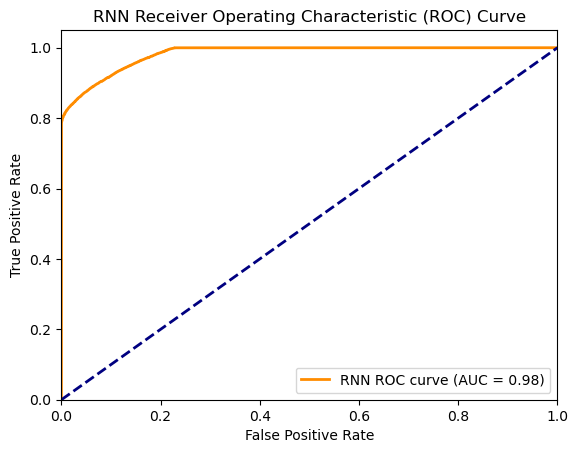

In [40]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [41]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=40, batch_size=batch_size)

Epoch 1/40


/Users/eddie/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


837/837 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.7605 - loss: 0.5078
Epoch 2/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8910 - loss: 0.3058
Epoch 3/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9035 - loss: 0.2417
Epoch 4/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9100 - loss: 0.1988
Epoch 5/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9082 - loss: 0.1816
Epoch 6/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9092 - loss: 0.1725
Epoch 7/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.9109 - loss: 0.1647
Epoch 8/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9103 - loss: 0.1598
Epoch 9/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9127 - loss: 0.1573
Epoch 10/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.9096 - loss: 0.1558
Epoch 11/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9129 - loss: 0.1528
Epoch 12/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 

419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


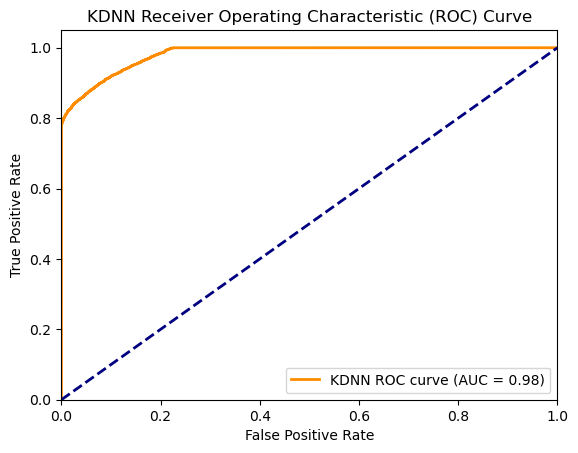

In [42]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [43]:
!pip install catboost
from catboost import CatBoostClassifier

In [44]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5554234	total: 65.6ms	remaining: 1m 5s
1:	learn: 0.4549192	total: 70.5ms	remaining: 35.2s
2:	learn: 0.3800343	total: 74.9ms	remaining: 24.9s
3:	learn: 0.3261092	total: 79.1ms	remaining: 19.7s
4:	learn: 0.2895229	total: 84ms	remaining: 16.7s
5:	learn: 0.2586120	total: 88.6ms	remaining: 14.7s
6:	learn: 0.2343293	total: 93.3ms	remaining: 13.2s
7:	learn: 0.2173318	total: 98.1ms	remaining: 12.2s
8:	learn: 0.2032591	total: 103ms	remaining: 11.3s
9:	learn: 0.1948102	total: 108ms	remaining: 10.7s
10:	learn: 0.1872365	total: 113ms	remaining: 10.1s
11:	learn: 0.1816453	total: 117ms	remaining: 9.65s
12:	learn: 0.1768622	total: 122ms	remaining: 9.27s
13:	learn: 0.1728870	total: 127ms	remaining: 8.98s
14:	learn: 0.1691394	total: 132ms	remaining: 8.69s
15:	learn: 0.1668989	total: 138ms	remaining: 8.46s
16:	learn: 0.1642498	total: 143ms	remaining: 8.25s
17:	learn: 0.1622732	total: 148ms	remaining: 8.06s
18:	learn: 0.1605804	total: 153ms	remaining: 7.89s
19:	l

183:	learn: 0.1440200	total: 1s	remaining: 4.46s
184:	learn: 0.1439631	total: 1.01s	remaining: 4.45s
185:	learn: 0.1439169	total: 1.02s	remaining: 4.45s
186:	learn: 0.1438611	total: 1.02s	remaining: 4.44s
187:	learn: 0.1438285	total: 1.03s	remaining: 4.44s
188:	learn: 0.1437822	total: 1.03s	remaining: 4.43s
189:	learn: 0.1437496	total: 1.04s	remaining: 4.42s
190:	learn: 0.1437105	total: 1.04s	remaining: 4.41s
191:	learn: 0.1436691	total: 1.05s	remaining: 4.41s
192:	learn: 0.1435962	total: 1.05s	remaining: 4.4s
193:	learn: 0.1435506	total: 1.06s	remaining: 4.4s
194:	learn: 0.1435141	total: 1.06s	remaining: 4.39s
195:	learn: 0.1434690	total: 1.07s	remaining: 4.39s
196:	learn: 0.1434256	total: 1.08s	remaining: 4.39s
197:	learn: 0.1433899	total: 1.08s	remaining: 4.38s
198:	learn: 0.1433357	total: 1.09s	remaining: 4.38s
199:	learn: 0.1433075	total: 1.09s	remaining: 4.37s
200:	learn: 0.1432526	total: 1.1s	remaining: 4.36s
201:	learn: 0.1432018	total: 1.1s	remaining: 4.36s
202:	learn: 0.14316

380:	learn: 0.1346190	total: 2.01s	remaining: 3.27s
381:	learn: 0.1345795	total: 2.02s	remaining: 3.27s
382:	learn: 0.1345421	total: 2.02s	remaining: 3.26s
383:	learn: 0.1344984	total: 2.03s	remaining: 3.25s
384:	learn: 0.1344498	total: 2.03s	remaining: 3.25s
385:	learn: 0.1343963	total: 2.04s	remaining: 3.24s
386:	learn: 0.1343447	total: 2.04s	remaining: 3.24s
387:	learn: 0.1343100	total: 2.05s	remaining: 3.23s
388:	learn: 0.1342927	total: 2.05s	remaining: 3.23s
389:	learn: 0.1342488	total: 2.06s	remaining: 3.22s
390:	learn: 0.1342154	total: 2.06s	remaining: 3.21s
391:	learn: 0.1341848	total: 2.07s	remaining: 3.21s
392:	learn: 0.1341547	total: 2.07s	remaining: 3.2s
393:	learn: 0.1341215	total: 2.08s	remaining: 3.2s
394:	learn: 0.1340845	total: 2.08s	remaining: 3.19s
395:	learn: 0.1340476	total: 2.09s	remaining: 3.19s
396:	learn: 0.1340059	total: 2.09s	remaining: 3.18s
397:	learn: 0.1339660	total: 2.1s	remaining: 3.17s
398:	learn: 0.1339325	total: 2.1s	remaining: 3.17s
399:	learn: 0.13

575:	learn: 0.1269155	total: 3.02s	remaining: 2.22s
576:	learn: 0.1268859	total: 3.02s	remaining: 2.21s
577:	learn: 0.1268605	total: 3.04s	remaining: 2.21s
578:	learn: 0.1268170	total: 3.04s	remaining: 2.21s
579:	learn: 0.1267786	total: 3.05s	remaining: 2.21s
580:	learn: 0.1267384	total: 3.05s	remaining: 2.2s
581:	learn: 0.1267052	total: 3.06s	remaining: 2.19s
582:	learn: 0.1266665	total: 3.06s	remaining: 2.19s
583:	learn: 0.1266126	total: 3.07s	remaining: 2.19s
584:	learn: 0.1265885	total: 3.07s	remaining: 2.18s
585:	learn: 0.1265622	total: 3.08s	remaining: 2.17s
586:	learn: 0.1265261	total: 3.08s	remaining: 2.17s
587:	learn: 0.1264705	total: 3.09s	remaining: 2.16s
588:	learn: 0.1264292	total: 3.09s	remaining: 2.16s
589:	learn: 0.1263978	total: 3.1s	remaining: 2.15s
590:	learn: 0.1263644	total: 3.1s	remaining: 2.15s
591:	learn: 0.1263290	total: 3.11s	remaining: 2.14s
592:	learn: 0.1262952	total: 3.11s	remaining: 2.14s
593:	learn: 0.1262650	total: 3.12s	remaining: 2.13s
594:	learn: 0.1

768:	learn: 0.1201634	total: 4.02s	remaining: 1.21s
769:	learn: 0.1201437	total: 4.02s	remaining: 1.2s
770:	learn: 0.1201083	total: 4.03s	remaining: 1.2s
771:	learn: 0.1200645	total: 4.03s	remaining: 1.19s
772:	learn: 0.1200307	total: 4.04s	remaining: 1.19s
773:	learn: 0.1200002	total: 4.04s	remaining: 1.18s
774:	learn: 0.1199671	total: 4.05s	remaining: 1.18s
775:	learn: 0.1199313	total: 4.05s	remaining: 1.17s
776:	learn: 0.1199007	total: 4.06s	remaining: 1.17s
777:	learn: 0.1198654	total: 4.07s	remaining: 1.16s
778:	learn: 0.1198240	total: 4.07s	remaining: 1.16s
779:	learn: 0.1197867	total: 4.08s	remaining: 1.15s
780:	learn: 0.1197604	total: 4.08s	remaining: 1.15s
781:	learn: 0.1197270	total: 4.09s	remaining: 1.14s
782:	learn: 0.1196808	total: 4.09s	remaining: 1.13s
783:	learn: 0.1196416	total: 4.1s	remaining: 1.13s
784:	learn: 0.1196063	total: 4.1s	remaining: 1.12s
785:	learn: 0.1195777	total: 4.11s	remaining: 1.12s
786:	learn: 0.1195467	total: 4.11s	remaining: 1.11s
787:	learn: 0.11

962:	learn: 0.1140488	total: 5.02s	remaining: 193ms
963:	learn: 0.1140085	total: 5.03s	remaining: 188ms
964:	learn: 0.1139823	total: 5.03s	remaining: 182ms
965:	learn: 0.1139456	total: 5.04s	remaining: 177ms
966:	learn: 0.1139059	total: 5.04s	remaining: 172ms
967:	learn: 0.1138578	total: 5.05s	remaining: 167ms
968:	learn: 0.1138324	total: 5.05s	remaining: 162ms
969:	learn: 0.1138049	total: 5.06s	remaining: 156ms
970:	learn: 0.1137596	total: 5.06s	remaining: 151ms
971:	learn: 0.1137298	total: 5.07s	remaining: 146ms
972:	learn: 0.1136872	total: 5.08s	remaining: 141ms
973:	learn: 0.1136600	total: 5.08s	remaining: 136ms
974:	learn: 0.1136233	total: 5.08s	remaining: 130ms
975:	learn: 0.1136057	total: 5.09s	remaining: 125ms
976:	learn: 0.1135796	total: 5.1s	remaining: 120ms
977:	learn: 0.1135555	total: 5.1s	remaining: 115ms
978:	learn: 0.1135321	total: 5.11s	remaining: 110ms
979:	learn: 0.1135136	total: 5.11s	remaining: 104ms
980:	learn: 0.1134840	total: 5.12s	remaining: 99.1ms
981:	learn: 0

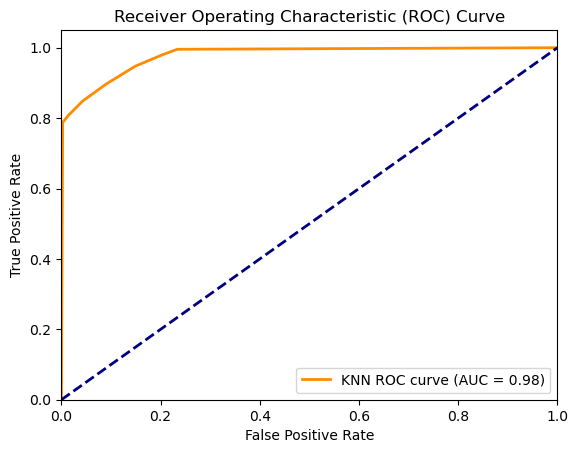

Decision Tree Metrics:
Accuracy: 0.9091
Precision: 0.9465
Recall: 0.8685
F1 Score: 0.9058
ROC AUC Score: 0.9094


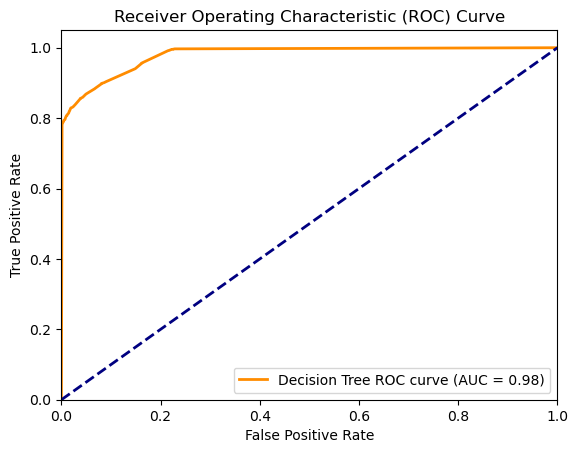

Random Forest Metrics:
Accuracy: 0.9118
Precision: 0.9405
Recall: 0.8804
F1 Score: 0.9095
ROC AUC Score: 0.9120


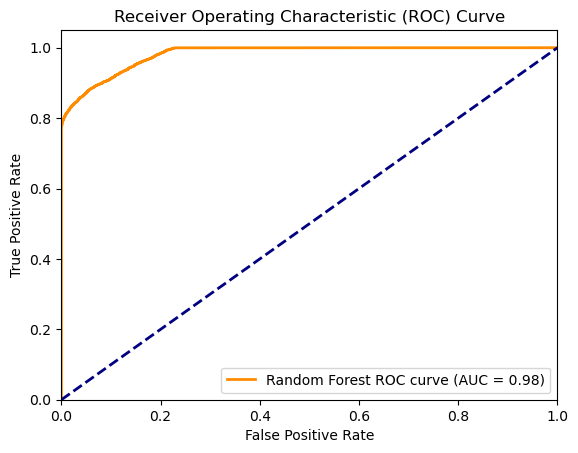

CatBoost Metrics:
Accuracy: 0.9079
Precision: 0.9261
Recall: 0.8877
F1 Score: 0.9065
ROC AUC Score: 0.9080


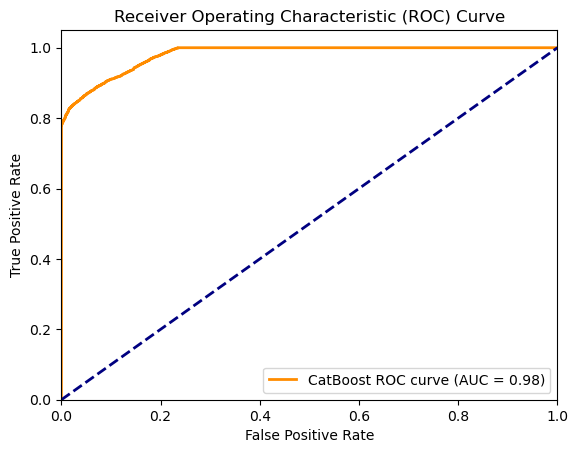

XGBoost Metrics:
Accuracy: 0.9108
Precision: 0.9386
Recall: 0.8802
F1 Score: 0.9085
ROC AUC Score: 0.9110


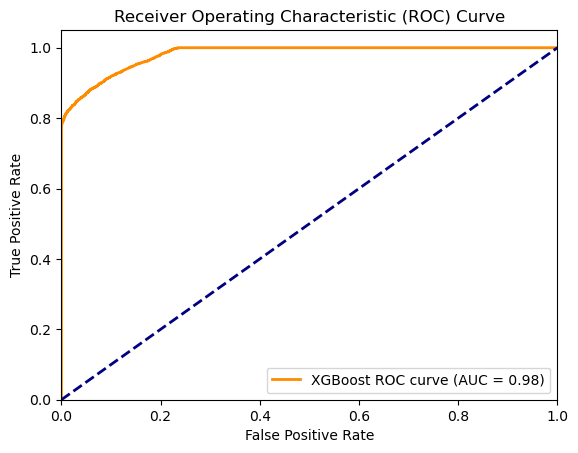

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [46]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5554234	total: 5.36ms	remaining: 5.35s
1:	learn: 0.4549192	total: 10.3ms	remaining: 5.13s
2:	learn: 0.3800343	total: 15.3ms	remaining: 5.08s
3:	learn: 0.3261092	total: 20.3ms	remaining: 5.06s
4:	learn: 0.2895229	total: 25.2ms	remaining: 5.01s
5:	learn: 0.2586120	total: 29.9ms	remaining: 4.95s
6:	learn: 0.2343293	total: 34.5ms	remaining: 4.89s
7:	learn: 0.2173318	total: 39.3ms	remaining: 4.88s
8:	learn: 0.2032591	total: 44ms	remaining: 4.85s
9:	learn: 0.1948102	total: 48.9ms	remaining: 4.84s
10:	learn: 0.1872365	total: 54ms	remaining: 4.85s
11:	learn: 0.1816453	total: 59.1ms	remaining: 4.86s
12:	learn: 0.1768622	total: 64.1ms	remaining: 4.87s
13:	learn: 0.1728870	total: 69.1ms	remaining: 4.87s
14:	learn: 0.1691394	total: 75ms	remaining: 4.93s
15:	learn: 0.1668989	total: 79.7ms	remaining: 4.9s
16:	learn: 0.1642498	total: 84.4ms	remaining: 4.88s
17:	learn: 0.1622732	total: 88.9ms	remaining: 4.85s
18:	learn: 0.1605804	total: 93.7ms	remaining: 4.83s

199:	learn: 0.1433075	total: 1s	remaining: 4s
200:	learn: 0.1432526	total: 1s	remaining: 4s
201:	learn: 0.1432018	total: 1.01s	remaining: 3.99s
202:	learn: 0.1431687	total: 1.01s	remaining: 3.98s
203:	learn: 0.1431231	total: 1.02s	remaining: 3.98s
204:	learn: 0.1429920	total: 1.03s	remaining: 4.01s
205:	learn: 0.1429593	total: 1.04s	remaining: 4s
206:	learn: 0.1429181	total: 1.04s	remaining: 4s
207:	learn: 0.1428473	total: 1.05s	remaining: 4s
208:	learn: 0.1427913	total: 1.05s	remaining: 3.99s
209:	learn: 0.1427167	total: 1.06s	remaining: 3.99s
210:	learn: 0.1426621	total: 1.06s	remaining: 3.98s
211:	learn: 0.1426278	total: 1.07s	remaining: 3.98s
212:	learn: 0.1425990	total: 1.07s	remaining: 3.97s
213:	learn: 0.1425651	total: 1.08s	remaining: 3.97s
214:	learn: 0.1425163	total: 1.08s	remaining: 3.96s
215:	learn: 0.1424658	total: 1.09s	remaining: 3.96s
216:	learn: 0.1424098	total: 1.09s	remaining: 3.95s
217:	learn: 0.1423656	total: 1.1s	remaining: 3.95s
218:	learn: 0.1423410	total: 1.11s

395:	learn: 0.1340476	total: 2s	remaining: 3.05s
396:	learn: 0.1340059	total: 2.01s	remaining: 3.05s
397:	learn: 0.1339660	total: 2.01s	remaining: 3.04s
398:	learn: 0.1339325	total: 2.02s	remaining: 3.04s
399:	learn: 0.1338903	total: 2.02s	remaining: 3.03s
400:	learn: 0.1338626	total: 2.03s	remaining: 3.03s
401:	learn: 0.1338423	total: 2.03s	remaining: 3.02s
402:	learn: 0.1337983	total: 2.04s	remaining: 3.02s
403:	learn: 0.1337528	total: 2.04s	remaining: 3.01s
404:	learn: 0.1337070	total: 2.05s	remaining: 3.01s
405:	learn: 0.1336643	total: 2.05s	remaining: 3s
406:	learn: 0.1336236	total: 2.06s	remaining: 3s
407:	learn: 0.1335898	total: 2.06s	remaining: 2.99s
408:	learn: 0.1335534	total: 2.07s	remaining: 2.99s
409:	learn: 0.1334879	total: 2.07s	remaining: 2.98s
410:	learn: 0.1334402	total: 2.08s	remaining: 2.98s
411:	learn: 0.1334028	total: 2.08s	remaining: 2.97s
412:	learn: 0.1333694	total: 2.09s	remaining: 2.97s
413:	learn: 0.1333398	total: 2.09s	remaining: 2.96s
414:	learn: 0.1333095

592:	learn: 0.1262952	total: 3s	remaining: 2.06s
593:	learn: 0.1262650	total: 3.01s	remaining: 2.06s
594:	learn: 0.1262309	total: 3.02s	remaining: 2.06s
595:	learn: 0.1261988	total: 3.03s	remaining: 2.06s
596:	learn: 0.1261553	total: 3.04s	remaining: 2.05s
597:	learn: 0.1261123	total: 3.04s	remaining: 2.04s
598:	learn: 0.1260916	total: 3.05s	remaining: 2.04s
599:	learn: 0.1260335	total: 3.05s	remaining: 2.04s
600:	learn: 0.1259966	total: 3.06s	remaining: 2.03s
601:	learn: 0.1259621	total: 3.06s	remaining: 2.02s
602:	learn: 0.1259207	total: 3.07s	remaining: 2.02s
603:	learn: 0.1258864	total: 3.07s	remaining: 2.01s
604:	learn: 0.1258219	total: 3.08s	remaining: 2.01s
605:	learn: 0.1257740	total: 3.08s	remaining: 2s
606:	learn: 0.1257283	total: 3.09s	remaining: 2s
607:	learn: 0.1256779	total: 3.09s	remaining: 1.99s
608:	learn: 0.1256431	total: 3.1s	remaining: 1.99s
609:	learn: 0.1256049	total: 3.1s	remaining: 1.98s
610:	learn: 0.1255757	total: 3.11s	remaining: 1.98s
611:	learn: 0.1255472	t

787:	learn: 0.1195301	total: 4.01s	remaining: 1.08s
788:	learn: 0.1195047	total: 4.02s	remaining: 1.07s
789:	learn: 0.1194739	total: 4.02s	remaining: 1.07s
790:	learn: 0.1194330	total: 4.03s	remaining: 1.06s
791:	learn: 0.1193892	total: 4.03s	remaining: 1.06s
792:	learn: 0.1193609	total: 4.04s	remaining: 1.05s
793:	learn: 0.1193327	total: 4.04s	remaining: 1.05s
794:	learn: 0.1192987	total: 4.05s	remaining: 1.04s
795:	learn: 0.1192598	total: 4.05s	remaining: 1.04s
796:	learn: 0.1192441	total: 4.06s	remaining: 1.03s
797:	learn: 0.1192260	total: 4.06s	remaining: 1.03s
798:	learn: 0.1191918	total: 4.07s	remaining: 1.02s
799:	learn: 0.1191606	total: 4.07s	remaining: 1.02s
800:	learn: 0.1191220	total: 4.08s	remaining: 1.01s
801:	learn: 0.1190967	total: 4.08s	remaining: 1.01s
802:	learn: 0.1190641	total: 4.09s	remaining: 1s
803:	learn: 0.1190248	total: 4.09s	remaining: 998ms
804:	learn: 0.1189975	total: 4.1s	remaining: 993ms
805:	learn: 0.1189761	total: 4.11s	remaining: 988ms
806:	learn: 0.11

981:	learn: 0.1134577	total: 5.02s	remaining: 92ms
982:	learn: 0.1134300	total: 5.02s	remaining: 86.9ms
983:	learn: 0.1134026	total: 5.04s	remaining: 81.9ms
984:	learn: 0.1133821	total: 5.04s	remaining: 76.8ms
985:	learn: 0.1133504	total: 5.05s	remaining: 71.7ms
986:	learn: 0.1133113	total: 5.06s	remaining: 66.6ms
987:	learn: 0.1132724	total: 5.06s	remaining: 61.5ms
988:	learn: 0.1132278	total: 5.07s	remaining: 56.4ms
989:	learn: 0.1132039	total: 5.07s	remaining: 51.2ms
990:	learn: 0.1131627	total: 5.08s	remaining: 46.1ms
991:	learn: 0.1131445	total: 5.08s	remaining: 41ms
992:	learn: 0.1131089	total: 5.09s	remaining: 35.9ms
993:	learn: 0.1130821	total: 5.09s	remaining: 30.7ms
994:	learn: 0.1130583	total: 5.1s	remaining: 25.6ms
995:	learn: 0.1130323	total: 5.1s	remaining: 20.5ms
996:	learn: 0.1130056	total: 5.11s	remaining: 15.4ms
997:	learn: 0.1129727	total: 5.12s	remaining: 10.3ms
998:	learn: 0.1129640	total: 5.12s	remaining: 5.13ms
999:	learn: 0.1129255	total: 5.13s	remaining: 0us
En

## ALL ENSEMBLE

In [48]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

TypeError: DTypePolicy.__new__() missing 1 required positional argument: 'name'

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [47]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

TypeError: DTypePolicy.__new__() missing 1 required positional argument: 'name'

## **ROC Curve and Confusion Matrix for ML Ensemble**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

In [ ]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()
